In [2]:
cd drive/MyDrive/Hands-on-CV-Project2/data


[Errno 2] No such file or directory: 'drive/MyDrive/Hands-on-CV-Project2/data'
/content/drive/MyDrive/Hands-on-CV-Project2


In [3]:
cd data/

/content/drive/MyDrive/Hands-on-CV-Project2/data


In [4]:
ls

archive/  archive.zip


In [5]:
!unzip archive.zip


Streaming output truncated to the last 5000 lines.
  inflating: assessment/spheres/rgb/5000.png  
  inflating: assessment/spheres/rgb/5001.png  
  inflating: assessment/spheres/rgb/5002.png  
  inflating: assessment/spheres/rgb/5003.png  
  inflating: assessment/spheres/rgb/5004.png  
  inflating: assessment/spheres/rgb/5005.png  
  inflating: assessment/spheres/rgb/5006.png  
  inflating: assessment/spheres/rgb/5007.png  
  inflating: assessment/spheres/rgb/5008.png  
  inflating: assessment/spheres/rgb/5009.png  
  inflating: assessment/spheres/rgb/5010.png  
  inflating: assessment/spheres/rgb/5011.png  
  inflating: assessment/spheres/rgb/5012.png  
  inflating: assessment/spheres/rgb/5013.png  
  inflating: assessment/spheres/rgb/5014.png  
  inflating: assessment/spheres/rgb/5015.png  
  inflating: assessment/spheres/rgb/5016.png  
  inflating: assessment/spheres/rgb/5017.png  
  inflating: assessment/spheres/rgb/5018.png  
  inflating: assessment/spheres/rgb/5019.png  
  inflati

In [17]:
!find /content -type d -name rgb -path "*assessment*cubes*" | head
!find /content -type f -path "*/assessment/cubes/rgb/5.png" | head


/content/drive/MyDrive/Hands-on-CV-Project2/assessment/cubes/rgb
/content/drive/MyDrive/Hands-on-CV-Project2/data/archive/assessment/cubes/rgb
/content/drive/MyDrive/Hands-on-CV-Project2/data/assessment/cubes/rgb
/content/drive/.Encrypted/MyDrive/Hands-on-CV-Project2/assessment/cubes/rgb
/content/drive/.Encrypted/MyDrive/Hands-on-CV-Project2/data/archive/assessment/cubes/rgb
/content/drive/.Encrypted/MyDrive/Hands-on-CV-Project2/data/assessment/cubes/rgb


In [8]:
!pip -q install fiftyone

import sys
from pathlib import Path
import matplotlib.pyplot as plt
import fiftyone as fo

# make repo importable
sys.path.append(str(Path(".").resolve()))

from src.datasets import AssessmentPairs, train_val_split, class_counts
from src.visualization import build_grouped_dataset, rgb_image_stats


Point to YOUR Drive path

In [34]:
# Example 1: if you copied data into the repo folder
ROOT = Path("/content/drive/MyDrive/Hands-on-CV-Project2/assessment")



In [33]:
!mv /content/drive/MyDrive/Hands-on-CV-Project2/data/assessment/spheres \
    /content/drive/MyDrive/Hands-on-CV-Project2/assessment/


Load pairs + split + required stats

In [35]:
pairs = AssessmentPairs(ROOT).load_pairs()
train_pairs, val_pairs = train_val_split(pairs, val_ratio=0.2, seed=42)

print("Total:", len(pairs), class_counts(pairs))
print("Train:", len(train_pairs), class_counts(train_pairs))
print("Val  :", len(val_pairs), class_counts(val_pairs))

rgb_paths = [p.rgb_path for p in pairs]
print(rgb_image_stats(rgb_paths))


Total: 19998 {'cubes': 9999, 'spheres': 9999}
Train: 15998 {'cubes': 7992, 'spheres': 8006}
Val  : 4000 {'cubes': 2007, 'spheres': 1993}
{'checked': 200, 'most_common_shape': '(64, 64, 4)', 'dtype_counts': {'uint8': 200}, 'shape_counts': {'(64, 64, 4)': 200}}


Class distribution plot

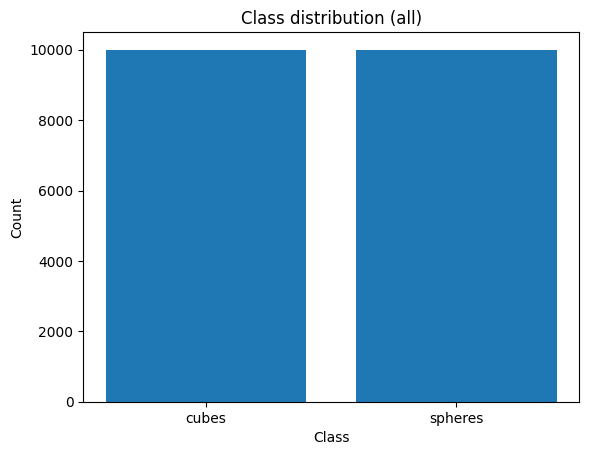

In [36]:
counts = class_counts(pairs)

plt.figure()
plt.bar(list(counts.keys()), list(counts.values()))
plt.title("Class distribution (all)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Build grouped FiftyOne dataset + launch

In [ ]:
ds = build_grouped_dataset(
    name="cilp_assessment",
    pairs=pairs,
    group_field="group",
    overwrite=True,
)

print(ds)
print("Slices:", ds.group_slices)

session = fo.launch_app(ds)
session


 100% |█████████████████████| 2/2 [40.4ms elapsed, 0s remaining, 49.5 samples/s]     


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [40.4ms elapsed, 0s remaining, 49.5 samples/s]     


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.9 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.8 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.2 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.8 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.9 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.2 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.1 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.7 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.9 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.9 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.8 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.9 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.9 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.0 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.5 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.0 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.5 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.7 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.3 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.4 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.8 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.6 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.3 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.9 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 320.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 320.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.0 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.2 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.9 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 285.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 285.5 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.0 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.1 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.4 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 388.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 388.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.2 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.2 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 230.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 230.9 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.7 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.9 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.0 samples/s]    


 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 216.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 216.1 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.5 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.3 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.0 samples/s]    


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 221.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 221.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.3 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.9 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.1 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.6 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.7 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.4 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.4 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.2 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.3 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.2 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.1 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.8 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.2 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.3 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.7 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 251.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 251.4 samples/s]    


 100% |█████████████████████| 2/2 [9.6ms elapsed, 0s remaining, 207.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.6ms elapsed, 0s remaining, 207.3 samples/s]    


 100% |█████████████████████| 2/2 [10.7ms elapsed, 0s remaining, 186.9 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.7ms elapsed, 0s remaining, 186.9 samples/s]   


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 242.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 242.5 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.2 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.5 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.2 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.8 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.4 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.8 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.6 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.3 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.4 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.4 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.0 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.2 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.1 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.6 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 321.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 321.4 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.9 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.0 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.6 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.7 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.9 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.0 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.2 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 327.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 327.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.6 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.7 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.9 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.2 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.4 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.1 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.3 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.6 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.8 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 347.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 347.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.5 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.5 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.4 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.3 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.9 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.4 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.2 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 259.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 259.9 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.8 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 283.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 283.9 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.4 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.9 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.7 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 236.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 236.4 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.8 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.9 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.9 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.0 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.9 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.6 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.9 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.0 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.2 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.8 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.4 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.8 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.0 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.1 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.8 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.2 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.6 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.9 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.3 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.4 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.1 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.1 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.7 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.6 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.0 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.4 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.8 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.1 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.4 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 245.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 245.1 samples/s]    


 100% |█████████████████████| 2/2 [10.8ms elapsed, 0s remaining, 184.5 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.8ms elapsed, 0s remaining, 184.5 samples/s]   


 100% |█████████████████████| 2/2 [10.3ms elapsed, 0s remaining, 194.2 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.3ms elapsed, 0s remaining, 194.2 samples/s]   


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.8 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.4 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 285.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 285.8 samples/s]    


 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 214.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 214.9 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.6 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.5 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.6 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.6 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.8 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.2 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.7 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.1 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.4 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.9 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.8 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.6 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 304.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 304.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.9 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.0 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.8 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.5 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.3 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.1 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.0 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.6 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.3 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.1 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.4 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 388.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 388.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.7 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.3 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.7 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.0 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.8 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.8 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.8 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.0 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.5 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.4 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.2 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.2 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.7 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.8 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 247.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 247.5 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.2 samples/s]    


 100% |█████████████████████| 2/2 [10.1ms elapsed, 0s remaining, 197.2 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.1ms elapsed, 0s remaining, 197.2 samples/s]   


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 245.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 245.6 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.2 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.3 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.7 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.2 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.7 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.1 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.6 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.8 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 327.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 327.9 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.6 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 246.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 246.9 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.1 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.5 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.6 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 287.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 287.9 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.4 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.7 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.5 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 246.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 246.1 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 244.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 244.3 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.6 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.0 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.0 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 244.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 244.0 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.3 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.6 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.0 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.7 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.8 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.2 samples/s]    


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 227.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 227.3 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.9 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.4 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.9 samples/s]    


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 222.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 222.4 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.1 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.5 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 320.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 320.4 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.4 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 296.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 296.1 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.5 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.4 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.7 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.1 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.4 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.5 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.1 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.8 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.3 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.8 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.3 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.5 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.3 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.2 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.5 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 242.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 242.5 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 219.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 219.0 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.3 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.3 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.4 samples/s]    


 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 215.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 215.4 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 242.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 242.9 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.5 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.0 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.8 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.4 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.0 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.0 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 257.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 257.9 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 242.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 242.4 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.8 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.3 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.1 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.3 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.0 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.5 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.3 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.8 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 259.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 259.9 samples/s]    


 100% |█████████████████████| 2/2 [9.8ms elapsed, 0s remaining, 204.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.8ms elapsed, 0s remaining, 204.1 samples/s]    


 100% |█████████████████████| 2/2 [9.8ms elapsed, 0s remaining, 203.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.8ms elapsed, 0s remaining, 203.1 samples/s]    


 100% |█████████████████████| 2/2 [9.2ms elapsed, 0s remaining, 216.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.2ms elapsed, 0s remaining, 216.2 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 232.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 232.6 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.8 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.6 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.7 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 231.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 231.5 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.4 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 296.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 296.5 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.7 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.4 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.1 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.4 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.0 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.5 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.1 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 300.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 300.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.1 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.2 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.0 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.1 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 259.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 259.4 samples/s]    


 100% |█████████████████████| 2/2 [10.2ms elapsed, 0s remaining, 196.6 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.2ms elapsed, 0s remaining, 196.6 samples/s]   


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.9 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.8 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.5 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.9 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.5 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.7 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.6 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.8 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.9 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.7 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.1 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.0 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.0 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.7 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.7 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 272.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 272.0 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.3 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.3 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.6 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.7 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.4 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.2 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.0 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 251.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 251.1 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.1 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 261.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 261.3 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.8 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.6 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.7 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.0 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.3 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.2 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.9 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.7 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.1 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.6 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 247.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 247.9 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.9 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.7 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.8 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.8 samples/s]    


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.2 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.3 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.7 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.9 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.8 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.9 samples/s]    


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 228.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 228.5 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.6 samples/s]    


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.6 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.7 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.1 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.7 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 296.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 296.9 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.1 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 247.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 247.4 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.3 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.2 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.1 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.1 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.0 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.3 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.5 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.1 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.6 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.7 samples/s]    


 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 214.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 214.1 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.0 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.3 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.7 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.8 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.5 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.8 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.5 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.3 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.4 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.3 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.8 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.5 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.4 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.5 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.3 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.4 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.3 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.2 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.7 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.5 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.3 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.1 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 257.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 257.2 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.7 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.7 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.6 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.4 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.2 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.8 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.1 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.0 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.7 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 336.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 336.1 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.9 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.3 samples/s]    


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.1 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.5 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.1 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.6 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.9 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 232.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 232.1 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.2 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 327.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 327.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.2 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.6 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.1 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.5 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.9 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.9 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.1 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.9 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.5 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 336.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 336.0 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.0 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.8 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.8 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.8 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.6 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.4 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.1 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.0 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.2 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.9 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.6 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 330.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 330.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.8 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.8 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.5 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.1 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.8 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.3 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.5 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.9 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.6 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.9 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.3 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.2 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.1 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.2 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.0 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.0 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 283.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 283.0 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.3 samples/s]    


 100% |█████████████████████| 2/2 [9.8ms elapsed, 0s remaining, 203.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.8ms elapsed, 0s remaining, 203.1 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.1 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 245.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 245.2 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.1 samples/s]    


 100% |█████████████████████| 2/2 [9.9ms elapsed, 0s remaining, 202.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.9ms elapsed, 0s remaining, 202.3 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.1 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.1 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.7 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.5 samples/s]    


 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 212.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 212.8 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.7 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.4 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.8 samples/s]    


 100% |█████████████████████| 2/2 [10.4ms elapsed, 0s remaining, 192.0 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.4ms elapsed, 0s remaining, 192.0 samples/s]   


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.5 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.7 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 272.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 272.1 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.1 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.0 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 304.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 304.6 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 259.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 259.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.5 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.6 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.6 samples/s]    


 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 212.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 212.9 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 246.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 246.7 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 283.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 283.9 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.2 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.0 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.3 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.6 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.2 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.7 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.8 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.5 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.1 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.0 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.4 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.0 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.2 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.7 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 233.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 233.9 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.8 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.9 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.5 samples/s]    


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 223.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 223.0 samples/s]    


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 222.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 222.9 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.7 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.9 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.1 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.4 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.3 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 325.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 325.1 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.5 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.3 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.5 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.2 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.4 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.1 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.3 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.2 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.4 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.1 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.5 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.1 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.0 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.8 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.5 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.4 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.6 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 320.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 320.5 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.4 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 330.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 330.7 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.9 samples/s]    


 100% |█████████████████████| 2/2 [9.2ms elapsed, 0s remaining, 218.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.2ms elapsed, 0s remaining, 218.5 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.2 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.4 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.2 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.7 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.5 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.4 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.9 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.8 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.2 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.7 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.0 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.0 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 442.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 442.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 373.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 373.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.8 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 423.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 423.3 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.8 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.8 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.3 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.5 samples/s]    


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 223.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 223.1 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.9 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.5 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.6 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.5 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.5 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 304.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 304.9 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.1 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.9 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.6 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.8 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.5 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.1 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.1 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.4 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.7 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.1 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.3 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.3 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.0 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.8 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.9 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 341.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 341.9 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.4 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.7 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.3 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.2 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.2 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.3 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.6 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.8 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.8 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.4 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.1 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.3 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.1 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.0 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.9 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.4 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.0 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.4 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.2 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.4 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.8 samples/s]    


 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 213.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 213.8 samples/s]    


 100% |█████████████████████| 2/2 [9.2ms elapsed, 0s remaining, 216.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.2ms elapsed, 0s remaining, 216.3 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 275.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 275.1 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.7 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.5 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.3 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.5 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.3 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.9 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.6 samples/s]    


 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 215.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 215.5 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.9 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.3 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.1 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.9 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 412.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 412.5 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.5 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.1 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.1 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.7 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.9 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.0 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.3 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.2 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.8 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 373.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 373.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.1 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.2 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.0 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.5 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.7 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.5 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.4 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 283.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 283.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.0 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.4 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.4 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 311.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 311.7 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.2 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 308.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 308.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.3 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.5 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.8 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.2 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.7 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.1 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.7 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.6 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.7 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.4 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 296.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 296.8 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.7 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 296.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 296.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.9 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 426.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 426.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.5 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.3 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.7 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.9 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.1 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.4 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 425.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 425.7 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.8 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 439.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 439.1 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.2 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 431.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 431.5 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 412.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 412.9 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.9 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.9 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 430.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 430.1 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.1 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.2 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.4 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.2 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.5 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 430.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 430.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.1 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 426.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 426.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.4 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 440.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 440.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.3 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 436.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 436.8 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.4 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.6 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.1 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 430.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 430.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.0 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.5 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.8 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.6 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.5 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.9 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 412.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 412.6 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.3 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.3 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.5 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.8 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.0 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 431.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 431.3 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.9 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.4 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.5 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.4 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.1 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.8 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.3 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 305.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 305.2 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.6 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.6 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.6 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.6 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 248.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 248.0 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.0 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.6 samples/s]    


 100% |█████████████████████| 2/2 [9.7ms elapsed, 0s remaining, 206.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.7ms elapsed, 0s remaining, 206.8 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 218.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 218.7 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.4 samples/s]    


 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 215.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.3ms elapsed, 0s remaining, 215.5 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.4 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 305.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 305.0 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.2 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.8 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.6 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.1 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.9 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.1 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.3 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.1 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.2 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.3 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.5 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.8 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.4 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.8 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 330.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 330.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.0 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.4 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 388.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 388.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.4 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.9 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.9 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.9 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.2 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.6 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.7 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.4 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.2 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.7 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.5 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.8 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.8 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.5 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 421.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 421.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.9 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 425.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 425.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.5 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.9 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.7 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.3 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.7 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.7 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.4 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 421.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 421.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.4 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 421.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 421.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.5 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.8 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.4 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.1 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.6 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.3 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.7 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.3 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.4 samples/s]    


 100% |█████████████████████| 2/2 [9.7ms elapsed, 0s remaining, 205.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.7ms elapsed, 0s remaining, 205.4 samples/s]    


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 222.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 222.4 samples/s]    


 100% |█████████████████████| 2/2 [9.9ms elapsed, 0s remaining, 201.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.9ms elapsed, 0s remaining, 201.9 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.8 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.6 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.3 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.7 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 321.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 321.4 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.7 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 254.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 254.9 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.3 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.0 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.3 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.0 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 252.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.0 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.0 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.4 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.1 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.9 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.0 samples/s]    


 100% |█████████████████████| 2/2 [10.0ms elapsed, 0s remaining, 200.8 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.0ms elapsed, 0s remaining, 200.8 samples/s]   


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 232.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 232.4 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.8 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.9 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.2 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.1 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.4 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.6 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.2 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.8 samples/s]    


 100% |█████████████████████| 2/2 [8.9ms elapsed, 0s remaining, 225.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.9ms elapsed, 0s remaining, 225.1 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.1 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.2 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 310.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 310.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.5 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.8 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.3 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.2 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.7 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.3 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.3 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.1 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 235.2 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 251.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 251.8 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.5 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.4 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 441.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 441.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.7 samples/s]    


 100% |█████████████████████| 2/2 [9.7ms elapsed, 0s remaining, 205.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.7ms elapsed, 0s remaining, 205.9 samples/s]    


 100% |█████████████████████| 2/2 [11.4ms elapsed, 0s remaining, 175.5 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [11.4ms elapsed, 0s remaining, 175.5 samples/s]   


 100% |█████████████████████| 2/2 [10.5ms elapsed, 0s remaining, 190.8 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.5ms elapsed, 0s remaining, 190.8 samples/s]   


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 253.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.4 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.0 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.5 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.3 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.3 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.0 samples/s]    


 100% |█████████████████████| 2/2 [10.4ms elapsed, 0s remaining, 193.1 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.4ms elapsed, 0s remaining, 193.1 samples/s]   


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 221.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 221.1 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.7 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 233.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 233.7 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.2 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.3 samples/s]    


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.8 samples/s]    


 100% |█████████████████████| 2/2 [9.6ms elapsed, 0s remaining, 208.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.6ms elapsed, 0s remaining, 208.8 samples/s]    


 100% |█████████████████████| 2/2 [10.0ms elapsed, 0s remaining, 200.4 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.0ms elapsed, 0s remaining, 200.4 samples/s]   


 100% |█████████████████████| 2/2 [9.9ms elapsed, 0s remaining, 202.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.9ms elapsed, 0s remaining, 202.5 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 240.9 samples/s]    


 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 213.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 213.2 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.6 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.4 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.7 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.9 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 248.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 248.0 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.6 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.0 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 430.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 430.8 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.1 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.1 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 326.5 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.0 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.9 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.4 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.9 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.2 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 275.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 275.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.2 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.8 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 305.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 305.0 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 321.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 321.3 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.0 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.4 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.8 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 231.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 231.6 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 245.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 245.2 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 268.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 268.6 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.9 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 230.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 230.1 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.7 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 242.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 242.5 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.3 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.0 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 310.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 310.0 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.5 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.4 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.6 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 275.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 275.1 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.4 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.5 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.0 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.6 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.9 samples/s]    


 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 212.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 212.3 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.1 samples/s]    


 100% |█████████████████████| 2/2 [8.9ms elapsed, 0s remaining, 225.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.9ms elapsed, 0s remaining, 225.0 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.2 samples/s]    


 100% |█████████████████████| 2/2 [10.0ms elapsed, 0s remaining, 199.1 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.0ms elapsed, 0s remaining, 199.1 samples/s]   


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 228.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 228.6 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.1 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.8 samples/s]    


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 222.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 222.4 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.8 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.2 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.9 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.8 samples/s]    


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 226.7 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 238.3 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 236.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 236.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.8 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.1 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.3 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 219.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 219.3 samples/s]    


 100% |█████████████████████| 2/2 [8.9ms elapsed, 0s remaining, 224.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.9ms elapsed, 0s remaining, 224.4 samples/s]    


 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 221.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.0ms elapsed, 0s remaining, 221.9 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.7 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.8 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.2 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 333.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.7 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.1 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 244.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 244.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.9 samples/s]    


 100% |█████████████████████| 2/2 [10.3ms elapsed, 0s remaining, 194.4 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [10.3ms elapsed, 0s remaining, 194.4 samples/s]   


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.0 samples/s]    


 100% |█████████████████████| 2/2 [12.9ms elapsed, 0s remaining, 155.0 samples/s]   


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [12.9ms elapsed, 0s remaining, 155.0 samples/s]   


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 227.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 227.5 samples/s]    


 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 211.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.4ms elapsed, 0s remaining, 211.9 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 245.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 245.8 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.6 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.3 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.3 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 425.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 425.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 369.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.1 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.7 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.3 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.8 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 360.8 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.3 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.7 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.6 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.6 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.9 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.7 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.5 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.8 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.6 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 395.7 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.5 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.7 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 388.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 388.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.8 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.4 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.8 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.0 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.5 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.9 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.4 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.5 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.0 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.1 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.3 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.6 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.8 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.1 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 341.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 341.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.3 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.4 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.9 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.4 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.3 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.2 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.3 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 365.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.9 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.7 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.6 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.5 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.2 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.1 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.7 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 372.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.0 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 428.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 428.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.6 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.1 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.3 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 363.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.3 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.1 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.3 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 445.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 445.9 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.9 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.7 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 359.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.1 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.5 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.0 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.6 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.4 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.0 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.2 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.5 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.8 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.0 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.7 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.2 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.6 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.7 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.9 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.3 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.8 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.7 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.8 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.1 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.8 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 234.6 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.0 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.5 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.5 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 245.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 245.9 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.7 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.3 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.4 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 280.8 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.5 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.1 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 237.6 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 233.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 233.1 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.3 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 421.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 421.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 387.9 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 272.4 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 327.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 327.9 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.3 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.9 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.4 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.8 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.6 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.0 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.0 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 360.3 samples/s]    


 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.1ms elapsed, 0s remaining, 220.0 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 257.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 257.5 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.0 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.5 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 233.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 233.6 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.5 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.8 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.4 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 251.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 251.4 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.8 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.0 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 268.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 268.9 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 343.3 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.5 samples/s]    


 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 231.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.6ms elapsed, 0s remaining, 231.9 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.6 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.1 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.3 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.6 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.0 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 229.7 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.5 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.3 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.8 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.7 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.1 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.5 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.8 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.9 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.6 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.7 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 415.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 415.5 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.9 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 308.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 308.1 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.7 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 325.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 325.1 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 311.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 311.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.7 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 310.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 310.5 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 311.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 311.1 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.9 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.7 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.7 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.6 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.8 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.3 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.2 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 330.6 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.1 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.2 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.2 samples/s]    


 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 246.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.1ms elapsed, 0s remaining, 246.2 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.2 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 440.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 440.9 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.2 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 442.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 442.9 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.5 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.9 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.3 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.1 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 428.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 428.0 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.7 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.2 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 415.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 415.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.9 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.3 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.3 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 268.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 268.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.4 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.3 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 379.4 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 350.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.4 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.7 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.2 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.9 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.7 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.0 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.1 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.3 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 329.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 329.6 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.4 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 311.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 311.1 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.5 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.1 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 441.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 441.0 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 437.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 437.7 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.3 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.1 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 294.2 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 418.6 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.1 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 404.1 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.8 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.4 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.2 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.5 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 283.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 283.8 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.5 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.0 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.6 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.2 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 267.9 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.1 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.6 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.1 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.6 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.4 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 305.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 305.0 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 423.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 423.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.1 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.5 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 298.8 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.2 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 342.4 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.9 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 241.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.1 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.4 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.6 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.6 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.2 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 291.3 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 265.0 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 307.3 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.2 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 288.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.9 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 439.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 439.4 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.9 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 427.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 427.5 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 430.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 430.7 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 441.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 441.0 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.4 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.8 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 444.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 444.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.5 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.3 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.7 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 292.2 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.6 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.7 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.8 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 305.8 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.5 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.5 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.7 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.4 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.5 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 320.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 320.1 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.7 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.5 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.1 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 426.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 426.7 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.1 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.4 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 396.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 396.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.0 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.8 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 329.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 329.1 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 434.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.4 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 437.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 437.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.4 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.3 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 304.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 304.7 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.5 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 308.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 308.1 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.9 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 354.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.1 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.1 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.1 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.9 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 323.0 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 303.3 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.0 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.0 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 301.4 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.0 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.5 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 281.3 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.2 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.5 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.3 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.2 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 285.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 285.6 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 287.5 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.1 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.3 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.8 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 341.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 319.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.5 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.1 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 293.3 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 409.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 412.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 401.4 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.2 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.8 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.4 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 435.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 435.4 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.4 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 351.3 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.7 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.3 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 403.1 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 408.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.7 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.4 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.2 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.3 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.1 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 415.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 415.1 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 444.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 444.0 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 380.0 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.0 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 382.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.1 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.6 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.1 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.1 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 344.8 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.2 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 308.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 308.8 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 282.7 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.9 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 340.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.0 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.1 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 266.4 samples/s]    


 100% |█████████████████████| 2/2 [9.2ms elapsed, 0s remaining, 217.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [9.2ms elapsed, 0s remaining, 217.9 samples/s]    


 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 268.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.5ms elapsed, 0s remaining, 268.2 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 299.3 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 386.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 414.1 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.0 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.9 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.2 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 431.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 431.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.7 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.0 samples/s]    


 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 444.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.5ms elapsed, 0s remaining, 444.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.5 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 406.8 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.6 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 423.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 423.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 412.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 412.7 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 377.6 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 410.8 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.6 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 389.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.1 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 376.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.8 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 429.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 400.0 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.4 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 394.8 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.7 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 362.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.2 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 329.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 329.4 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 345.3 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.1 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 313.8 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 331.0 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 296.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 296.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.7 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.2 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 314.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 367.0 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 332.7 samples/s]    


 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 283.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.1ms elapsed, 0s remaining, 283.2 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 310.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 310.1 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.3 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.4 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 398.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.4 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 315.1 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 278.2 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.3 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 368.1 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 348.6 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.7 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.8 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.7 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.3 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.6 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 230.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 230.5 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 324.0 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 268.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 268.7 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 366.9 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.8 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 325.5 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.1 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 256.9 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.8 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 306.7 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.7 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 321.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 321.0 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.9 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 330.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 330.9 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.1 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 329.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 329.9 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 337.2 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 420.4 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 405.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 413.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.1 samples/s]    


 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 431.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.6ms elapsed, 0s remaining, 431.0 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.1 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 422.9 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.5 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.1 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.9 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 416.6 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 407.4 samples/s]    


 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.7ms elapsed, 0s remaining, 424.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.5 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.9 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.8 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 318.1 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 255.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 378.7 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.6 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 271.3 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 417.4 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 383.6 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 374.1 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 339.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 370.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.2 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 381.2 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 399.7 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 415.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 415.0 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 373.8 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 390.6 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 397.8 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 276.7 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 300.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 300.9 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 297.2 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 270.7 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 317.8 samples/s]    


 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.6ms elapsed, 0s remaining, 302.5 samples/s]    


 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.9ms elapsed, 0s remaining, 254.3 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.7 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.8 samples/s]    


 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.2ms elapsed, 0s remaining, 322.4 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 285.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 285.2 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 286.2 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 384.8 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 269.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.3 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.2 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 279.2 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 249.3 samples/s]    


 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 227.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.8ms elapsed, 0s remaining, 227.1 samples/s]    


 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.8ms elapsed, 0s remaining, 295.6 samples/s]    


 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.2ms elapsed, 0s remaining, 385.2 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 358.7 samples/s]    


 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.1ms elapsed, 0s remaining, 328.0 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.1 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 349.2 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 336.9 samples/s]    


 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.3ms elapsed, 0s remaining, 316.6 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.3 samples/s]    


 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.2ms elapsed, 0s remaining, 243.3 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.5 samples/s]    


 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.4ms elapsed, 0s remaining, 239.1 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.2 samples/s]    


 100% |█████████████████████| 2/2 [8.9ms elapsed, 0s remaining, 223.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.9ms elapsed, 0s remaining, 223.8 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 264.2 samples/s]    


 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 236.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.5ms elapsed, 0s remaining, 236.6 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.2 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 361.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.2 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 353.2 samples/s]    


 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.3ms elapsed, 0s remaining, 375.7 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 402.9 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 273.9 samples/s]    


 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.0ms elapsed, 0s remaining, 284.0 samples/s]    


 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.8ms elapsed, 0s remaining, 419.9 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 391.8 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.0 samples/s]    


 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.5ms elapsed, 0s remaining, 364.3 samples/s]    


 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.0ms elapsed, 0s remaining, 396.4 samples/s]    


 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.4ms elapsed, 0s remaining, 312.8 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 393.7 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 346.1 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 355.6 samples/s]    


 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.2 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.1ms elapsed, 0s remaining, 392.2 samples/s]    


 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.3 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.8ms elapsed, 0s remaining, 347.3 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 356.4 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 262.6 samples/s]    


 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 272.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.4ms elapsed, 0s remaining, 272.1 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 290.8 samples/s]    


 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.9ms elapsed, 0s remaining, 289.6 samples/s]    


 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.6ms elapsed, 0s remaining, 357.6 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.5 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.7 samples/s]    


 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 239.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.3ms elapsed, 0s remaining, 239.9 samples/s]    


 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 258.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.8ms elapsed, 0s remaining, 258.0 samples/s]    


 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 230.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.7ms elapsed, 0s remaining, 230.0 samples/s]    


 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.2ms elapsed, 0s remaining, 277.9 samples/s]    


 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.7ms elapsed, 0s remaining, 300.4 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 248.9 samples/s]    


 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.4ms elapsed, 0s remaining, 371.0 samples/s]    


 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [4.9ms elapsed, 0s remaining, 411.8 samples/s]    


 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.7ms elapsed, 0s remaining, 352.4 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.4 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 334.4 samples/s]    


 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.1 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [8.0ms elapsed, 0s remaining, 250.1 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.5 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 261.5 samples/s]    


 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.8 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.0ms elapsed, 0s remaining, 335.8 samples/s]    


 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [6.5ms elapsed, 0s remaining, 309.9 samples/s]    


 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.0 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.6ms elapsed, 0s remaining, 263.0 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 260.6 samples/s]    


 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.6 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.7ms elapsed, 0s remaining, 258.6 samples/s]    


 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.7 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [7.3ms elapsed, 0s remaining, 274.7 samples/s]    


 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.9 samples/s]    


INFO:eta.core.utils: 100% |█████████████████████| 2/2 [5.9ms elapsed, 0s remaining, 338.9 samples/s]    


# Dataset Visualization with FiftyOne



Setup